Load the Dataset into a DataFrame

In [4]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Data/diabetes.csv'
data = pd.read_csv(file_path)

# Display dataset overview
print("Dataset Preview:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nDataset Statistics:")
print(data.describe())


Mounted at /content/drive
Dataset Preview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               

Step 2: Preprocess the Data

1.Replace Missing or Invalid Values

In [5]:
import numpy as np

# Columns to replace 0 values with NaN
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_to_fix] = data[cols_to_fix].replace(0, np.nan)

2.Impute Missing Values

In [6]:
# Fill NaN with median values
data.fillna(data.median(), inplace=True)

3.Standardize Features

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Step 3: Regression Task - Predict Blood Pressure

1.Define Features and Target

In [8]:
X_reg = data.drop(['BloodPressure', 'Outcome'], axis=1)
y_reg = data['BloodPressure']

2.Split Data into Train and Test Sets

In [9]:
from sklearn.model_selection import train_test_split

X_reg_scaled = scaler.fit_transform(X_reg)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_scaled, y_reg, test_size=0.2, random_state=42
)

3.Train a Linear Regression Model

In [10]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

LinearRegression()

4.Evaluate the Model
Predict and evaluate:

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_reg = reg_model.predict(X_test_reg)
print("Regression Task:")
print(f"Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_reg):.2f}")
print(f"R2 Score: {r2_score(y_test_reg, y_pred_reg):.2f}")

Regression Task:
Mean Squared Error: 111.26
R2 Score: 0.24


5.Visualize Results

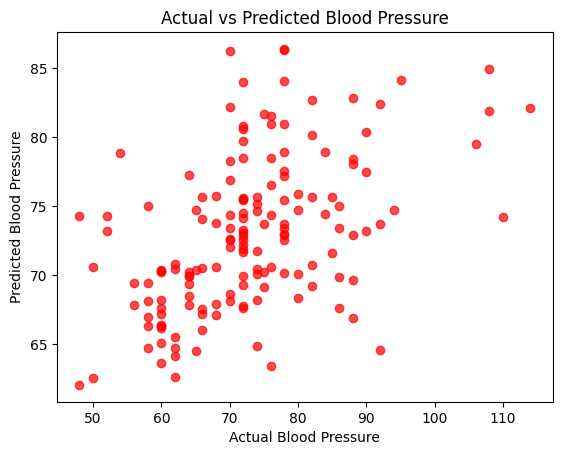

In [15]:
import matplotlib.pyplot as plt

plt.scatter(y_test_reg, y_pred_reg, alpha=0.7, color='r')
plt.xlabel('Actual Blood Pressure')
plt.ylabel('Predicted Blood Pressure')
plt.title('Actual vs Predicted Blood Pressure')
plt.show()

Step 4: Classification Task - Predict Diabetes Outcome

Option A: Logistic Regression 1.Define Features and Target

In [16]:
X_cls = data.drop(['Outcome'], axis=1)
y_cls = data['Outcome']

2.Split Data into Train and Test Sets

In [17]:
X_cls_scaled = scaler.fit_transform(X_cls)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls_scaled, y_cls, test_size=0.2, random_state=42
)

3.Train Logistic Regression Model

In [18]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_cls, y_train_cls)

LogisticRegression()

4.Evaluate the Model

In [19]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_cls_log = log_reg.predict(X_test_cls)
print("Classification Task (Logistic Regression):")
print(f"Accuracy: {accuracy_score(y_test_cls, y_pred_cls_log):.2f}")
print("Classification Report:")
print(classification_report(y_test_cls, y_pred_cls_log))

Classification Task (Logistic Regression):
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



Option B: K-Nearest Neighbors (KNN)

1.Train KNN Model

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_cls, y_train_cls)

KNeighborsClassifier()

2.Evaluate the KNN Model

In [21]:
y_pred_cls_knn = knn_model.predict(X_test_cls)
print("Classification Task (KNN):")
print(f"Accuracy: {accuracy_score(y_test_cls, y_pred_cls_knn):.2f}")
print("Classification Report:")
print(classification_report(y_test_cls, y_pred_cls_knn))

Classification Task (KNN):
Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79        99
           1       0.61      0.69      0.65        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154

